Librerias

In [6]:
import pandas as pd
from zipfile import ZipFile

In [5]:
# Ver archivos de la carpeta
import os

ruta = "/Users/gabyt/OneDrive/Documentos/Trabajos UL/2023-2/IA/spaceship-titanic(1)"
archivos = os.listdir(ruta)
print(archivos)


['test.csv', 'train.csv']


In [7]:
# para extraer de la carpeta
def unzip_data(path):
    with ZipFile(path, 'r') as zipObj:
        zipObj.extractall()

In [8]:
from zipfile import ZipFile

def unzip_data(path):
    with ZipFile(path, 'r') as zipObj:
        zipObj.extractall()

ruta_zip = "/Users/gabyt/OneDrive/Documentos/Trabajos UL/2023-2/IA/spaceship-titanic(1).zip"

# para descomprimir un zip
unzip_data(ruta_zip)


 leer el archivo de training y el test set

In [9]:

import pandas as pd

ruta_train = "/Users/gabyt/OneDrive/Documentos/Trabajos UL/2023-2/IA/spaceship-titanic(1)/train.csv"
ruta_test = "/Users/gabyt/OneDrive/Documentos/Trabajos UL/2023-2/IA/spaceship-titanic(1)/test.csv"

train_ds = pd.read_csv(ruta_train)
test_ds = pd.read_csv(ruta_test)


primeras 5 líneas del archivo de training

In [10]:
print(train_ds.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [11]:
print(test_ds.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez  


datos de training y de test 

In [12]:
ntrain = train_ds.shape[0]
ntest = test_ds.shape[0]

print(f'Dataset has {ntrain} train samples')
print(f'Dataset has {ntest} test samples')


Dataset has 8693 train samples
Dataset has 4277 test samples


tipo de datos del dataset

In [13]:
train_ds.info()

test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  

valores nulos

In [14]:
null_counts_train = train_ds.isnull().sum()

print("Campos nulos en el training set:")
print(null_counts_train)

Campos nulos en el training set:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [15]:
def impute_most_frequent_data(df):
    for column_name in df.columns:
        data = df[column_name].value_counts().index[0]
        df[column_name].fillna(data, inplace=True)
    return df


In [16]:
train_ds = impute_most_frequent_data(train_ds)

print(train_ds.head())

  PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         Tru

valores nulos

In [17]:
null_counts_train = train_ds.isnull().sum()

print("Campos nulos en el training set después de la imputación:")
print(null_counts_train)


Campos nulos en el training set después de la imputación:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


columnas HomePlanet y VIP

In [18]:
home_planet_vs_vip = train_ds.groupby(['HomePlanet', 'VIP'])['VIP'].sum()

print(home_planet_vs_vip)

HomePlanet  VIP  
Earth       False      0
            True       5
Europa      False      0
            True     131
Mars        False      0
            True      63
Name: VIP, dtype: int64


gráfico de barras 

C:\Users\gabyt\AppData\Local\Temp\ipykernel_2536\2616335822.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(home_planet_vs_vip.index.get_level_values('HomePlanet'), rotation=45)


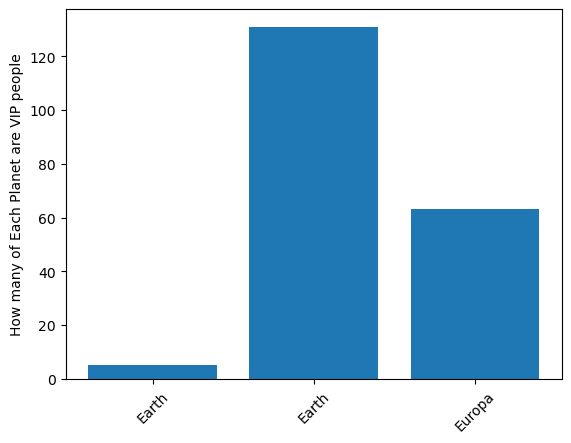

In [19]:
# Genere un grafico de barras donde
# x = 'HomePlanet'
# y = cantidade de personas que fueron VIP
# rote los labels a 45°

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(home_planet_vs_vip.index.get_level_values('HomePlanet'), home_planet_vs_vip.values)
ax.set_xticklabels(home_planet_vs_vip.index.get_level_values('HomePlanet'), rotation=45)
ax.set_ylabel("How many of Each Planet are VIP people")
plt.show()


agrupacion por edad

In [39]:
gastos_edad = test_ds.groupby('Age')['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'].sum()
print(gastos_edad)


      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
Age                                                       
0.0           0.0        0.0           0.0     0.0     0.0
1.0           0.0        0.0           0.0     0.0     0.0
2.0           0.0        0.0           0.0     0.0     0.0
3.0           0.0        0.0           0.0     0.0     0.0
4.0           0.0        0.0           0.0     0.0     0.0
...           ...        ...           ...     ...     ...
74.0        568.0       17.0           0.0     0.0     1.0
75.0        940.0        0.0           0.0  1188.0    60.0
77.0          0.0        0.0          64.0   712.0     0.0
78.0          0.0        0.0           0.0     0.0     0.0
79.0          0.0       53.0         881.0    11.0  1568.0

[79 rows x 5 columns]


C:\Users\gabyt\AppData\Local\Temp\ipykernel_2536\148399653.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gastos_edad = test_ds.groupby('Age')['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'].sum()


Realizamos un gráfico de dispersión para ver cuanto gastan por edad

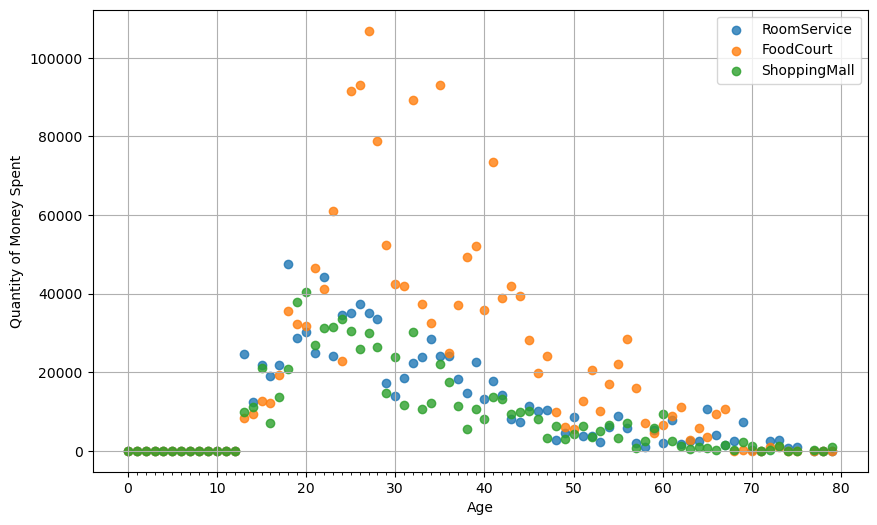

In [40]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(gastos_edad.columns)-2):
    ax.scatter(gastos_edad.index, gastos_edad.iloc[:, i], alpha=0.8)
    ax.legend(gastos_edad.columns[:-2])
ax.set_xlabel("Age")
ax.set_xticks(ticks=range(0, 80), minor=True)
ax.set_ylabel("Quantity of Money Spent")
ax.grid()

plt.show()


Histograma

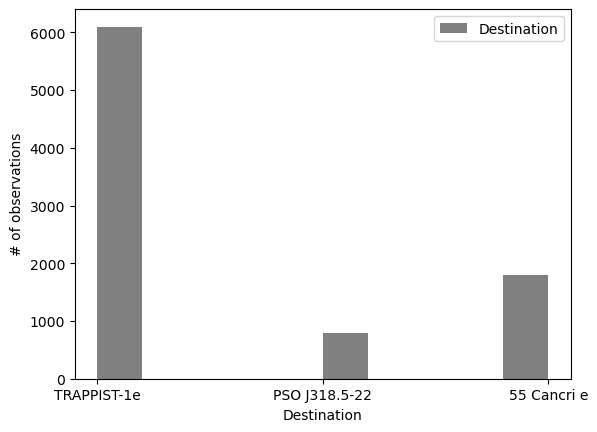

In [22]:
# realice un grafico de histograma para los destinos versus las características
fig, ax = plt.subplots()
ax.hist(train_ds['Destination'], label="Destination", color='gray')
ax.set_xlabel("Destination")
ax.set_ylabel("# of observations")
ax.legend()
plt.show()


### Machine Learning

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
def column_transform(df, categorical_columns):
    for col in categorical_columns:
        col_ohe = pd.get_dummies(df[col], prefix=col)
        df = pd.concat((df, col_ohe), axis=1).drop(col, axis=1)
    return df

In [26]:
train_ds_ohe = column_transform(df=train_ds, categorical_columns=['HomePlanet', 'Destination'])
print(train_ds_ohe.head())

  PassengerId  CryoSleep  Cabin   Age    VIP  RoomService  FoodCourt  \
0     0001_01      False  B/0/P  39.0  False          0.0        0.0   
1     0002_01      False  F/0/S  24.0  False        109.0        9.0   
2     0003_01      False  A/0/S  58.0   True         43.0     3576.0   
3     0003_02      False  A/0/S  33.0  False          0.0     1283.0   
4     0004_01      False  F/1/S  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck               Name  Transported  \
0           0.0     0.0     0.0    Maham Ofracculy        False   
1          25.0   549.0    44.0       Juanna Vines         True   
2           0.0  6715.0    49.0      Altark Susent        False   
3         371.0  3329.0   193.0       Solam Susent        False   
4         151.0   565.0     2.0  Willy Santantines         True   

   HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0                 0                  1                0   
1                 1                  0        

In [27]:
X = train_ds_ohe.drop(['PassengerId', 'Cabin', 'Name', 'Transported'], axis=1)

y = train_ds_ohe['Transported']

In [28]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Realizamos un clasificador

In [29]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Llamar a make_pipeline con StandardScaler() y SGDClassifier con max_iter=1000, tol=1e-3
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

# Llamar al método fit() del clasificador para entrenar el modelo
clf.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [33]:
def preprocess_test_set(test_df):
    test_df = column_transform(df=test_df, categorical_columns=['HomePlanet','Destination'])
    test_df = test_df.drop(['PassengerId', 'Cabin', 'Name'], axis=1)
    return impute_most_frequent_data(test_df)

In [36]:
test_data = preprocess_test_set(test_df)

NameError: name 'test_df' is not defined

predicciones

In [37]:
y_pred = clf.predict(test_data)

NameError: name 'test_data' is not defined

llegaron o no las personas (predicciones)

In [38]:
import pandas as pd

predictions_df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Transported': y_pred})

count_transported = predictions_df['Transported'].sum()
count_not_transported = len(predictions_df) - count_transported

print("Cantidad de predicciones de pasajeros transportados:", count_transported)
print("Cantidad de predicciones de pasajeros no transportados:", count_not_transported)


NameError: name 'test_data' is not defined